### **Human Behaviour – Sentiment Analysis/Natural Language Processing of human texts and opinions**

**Dataset:** Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

https://www.kaggle.com/datasets/kazanova/sentiment140?resource=download

Import the various libraries

In [160]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import TruncatedSVD, PCA

Import the csv file containing the data

In [120]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding='ISO-8859-1', header=None)
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

In [121]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [123]:
data['sentiment'] = data['target'].apply(lambda x: 0 if x == 0 else 1)

Cleaning of the data by changing to lowercase, tokenizing, lemmatization, removing special characters and stopwords.

In [124]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [125]:
def clean_text(text):
    # Remove URLs, mentions, hashtags, and non-alphabetic characters
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower().strip()
    # Tokenize and remove stopwords, then lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [126]:
data['clean_text'] = data['text'].apply(clean_text)

Word Cloud showing the Most Frequent Words for both Positive and Negative tweets

In [127]:
positive_text = ' '.join(data[data['sentiment'] == 1]['clean_text'])
negative_text = ' '.join(data[data['sentiment'] == 0]['clean_text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

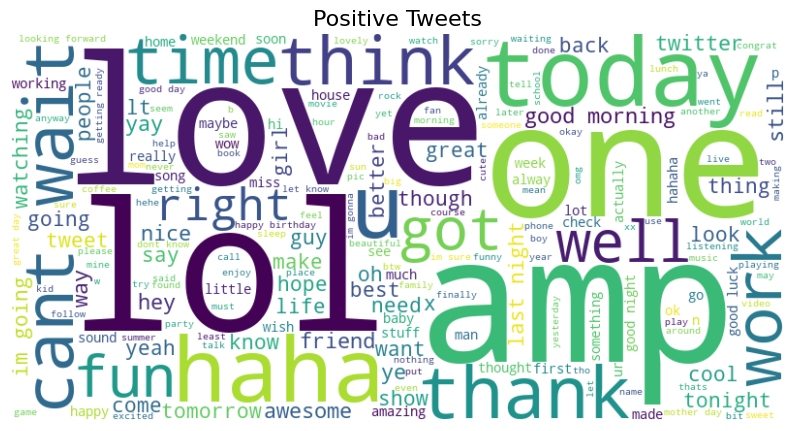

In [128]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets', fontsize=16)
plt.show()

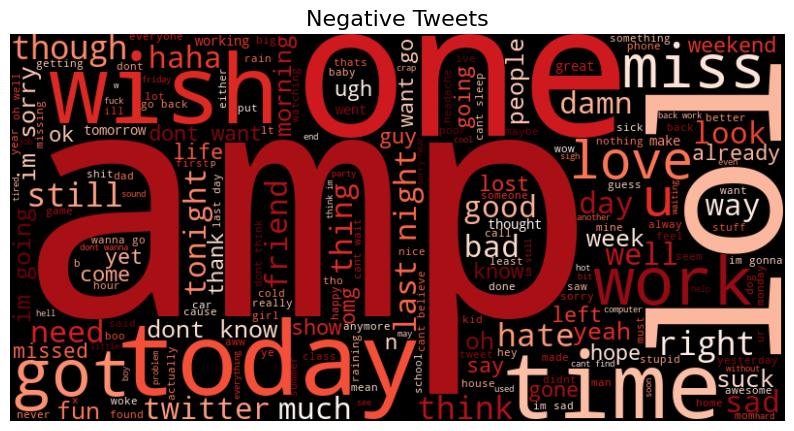

In [129]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets', fontsize=16)
plt.show()

Bar chart showing the distribution of sentiment labels

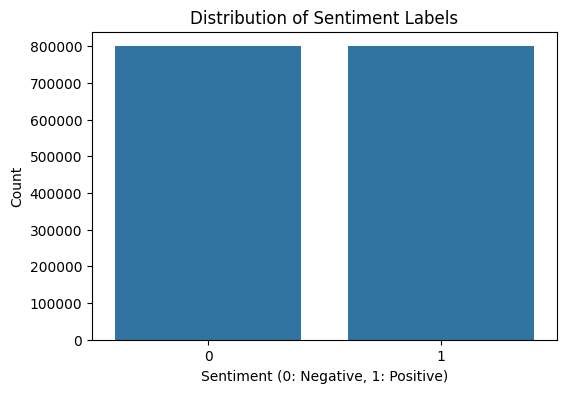

In [130]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

Histogram showing the distribution of tweet length

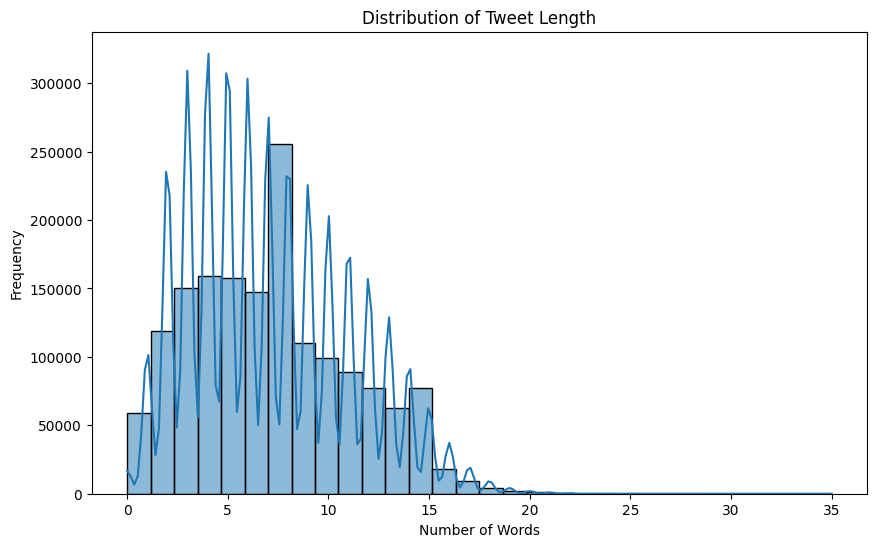

In [131]:
data['tweet_length'] = data['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Average Length on Positive and Negative Reviews

In [132]:
print("\nAverage Review Length:")
print(f"Negative Reviews: {data[data['sentiment'] == 0]['tweet_length'].mean():.2f} words")
print(f"Positive Reviews: {data[data['sentiment'] == 1]['tweet_length'].mean():.2f} words")


Average Review Length:
Negative Reviews: 7.33 words
Positive Reviews: 6.91 words


Supervised ML model to predict sentiment

In [133]:
X = data['clean_text']
y = data['sentiment']

Divide the data into test and train data

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Fit the logistic regression model

In [136]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

Model prediction

In [137]:
y_pred = lr.predict(X_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7731
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           1       0.76      0.79      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



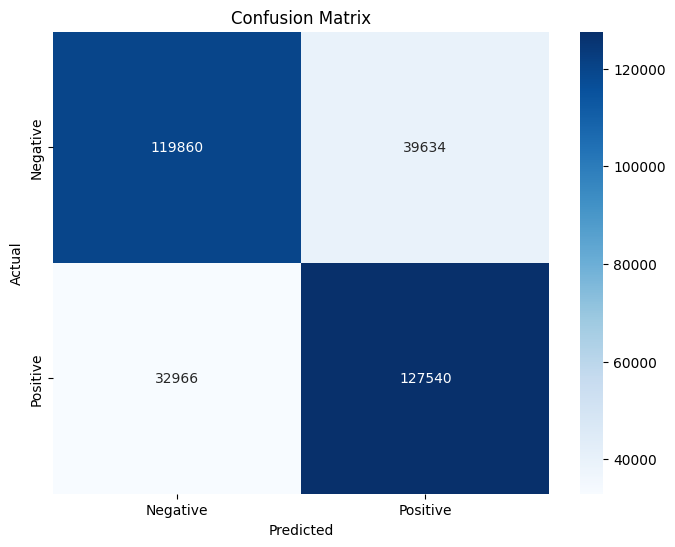

In [138]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [139]:
hypothetical_texts = [
    "Absolutely fantastic movie, I loved it!",  # Positive
    "This was the worst film I've ever seen.",  # Negative
    "What a lovely day!", # Positive
    "I loathe rude people", # Negative
    "Joseph exhibited bad mannerisms" # Negative
]

In [140]:
cleaned_hypo = [clean_text(text) for text in hypothetical_texts]
hypo_vectors = vectorizer.transform(cleaned_hypo)

In [141]:
predictions = lr.predict(hypo_vectors)

In [142]:
print("\nHypothetical Data Predictions:")
for text, pred in zip(hypothetical_texts, predictions):
    print(f"Text: '{text}' => Sentiment: {pred}")


Hypothetical Data Predictions:
Text: 'Absolutely fantastic movie, I loved it!' => Sentiment: 1
Text: 'This was the worst film I've ever seen.' => Sentiment: 0
Text: 'What a lovely day!' => Sentiment: 1
Text: 'I loathe rude people' => Sentiment: 0
Text: 'Joseph exhibited bad mannerisms' => Sentiment: 0


Unsupervised Machine Learning model for classification

In [162]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_vec)

In [163]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

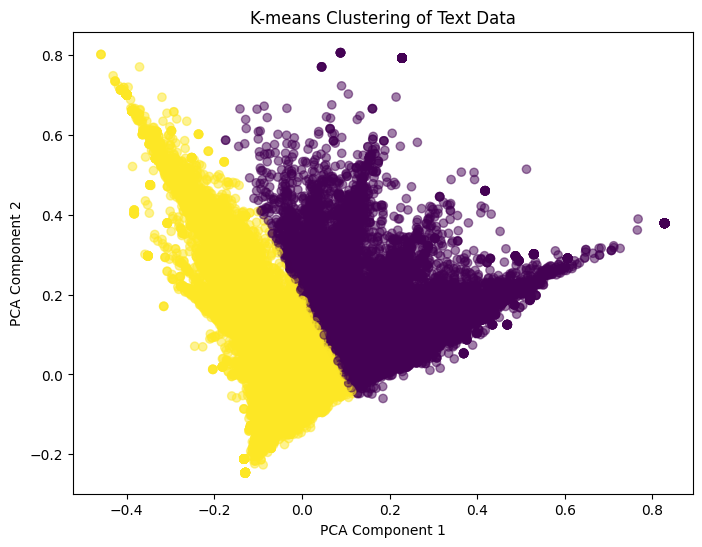

In [164]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [167]:
cluster_df = pd.DataFrame({'cluster': data['cluster'], 'sentiment': data['sentiment']})
cross_tab = pd.crosstab(cluster_df['cluster'], cluster_df['sentiment'])
print("\nCluster vs Sentiment Cross-Tabulation:\n", cross_tab)


Cluster vs Sentiment Cross-Tabulation:
 sentiment       0       1
cluster                  
0          773289  742675
1           26711   57325
